## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [2]:
from sklearn.datasets import make_classification

In [70]:
X,Y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [71]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(Y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1).reset_index(drop=True)
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [72]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [6]:
import seaborn as sns

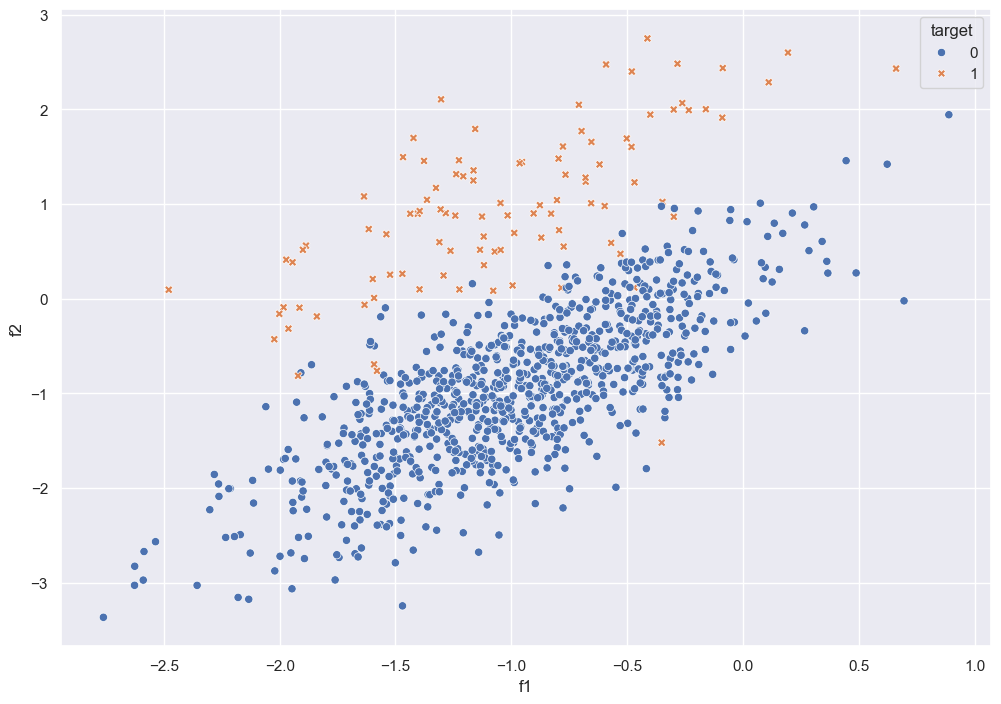

In [73]:
sns.scatterplot(data=final_df, x= 'f1', y='f2', style = 'target', palette='deep', hue='target')
# sns.scatterplot(final_df['f2'], color = 'red', s = 20, marker ='^')

sns.set_theme(style = 'darkgrid', palette='pastel' ,rc={'figure.figsize':(12,8.27)})

In [74]:
!pip install imblearn

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
## transform the dataset
oversample=SMOTE()
X,Y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [77]:
X.shape

(1800, 2)

In [83]:
Y.shape

(1800,)

In [84]:
len(Y[Y==0])

900

In [85]:
len(Y[Y==1])

900

In [95]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(Y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)
oversample_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.097011,0.919953,1
1796,-0.476705,0.154794,1
1797,-0.768275,1.033485,1
1798,-0.225314,1.986124,1


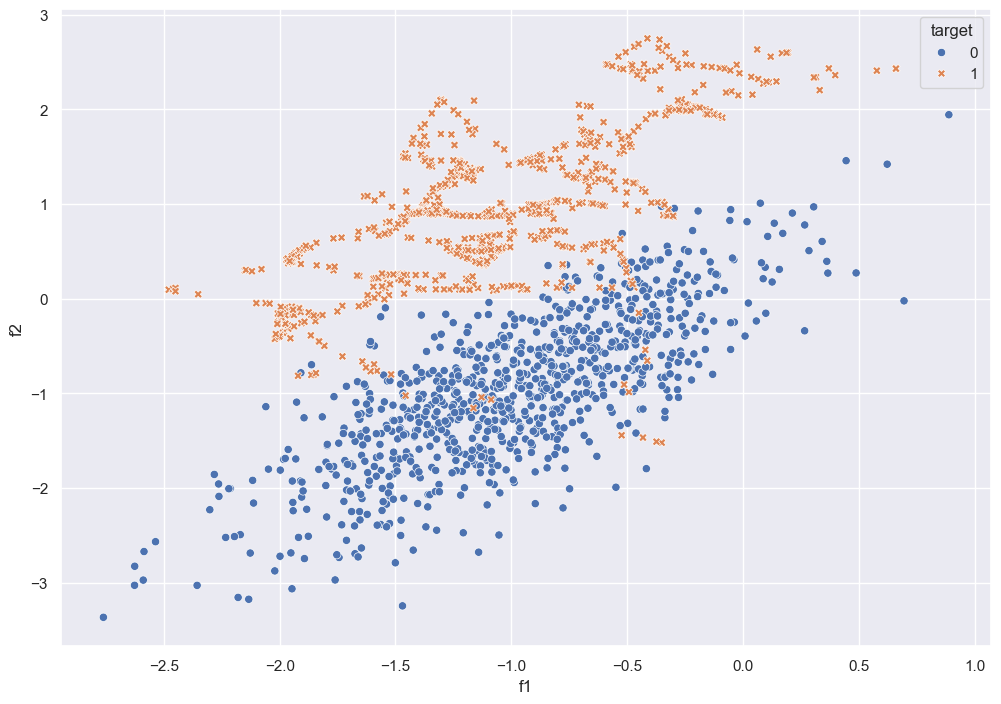

In [96]:
sns.scatterplot(data=oversample_df, x= 'f1', y='f2', style = 'target', palette='deep', hue='target')
# sns.scatterplot(final_df['f2'], color = 'red', s = 20, marker ='^')

sns.set_theme(style = 'darkgrid', palette='pastel' ,rc={'figure.figsize':(12,8.27)})